In [46]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

import utils

In [47]:
eth_data = utils.load_eth_data()

eth_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [48]:
close_data = eth_data['Close']
close_data.head()

Date
2020-01-01    130.802002
2020-01-02    127.410179
2020-01-03    134.171707
2020-01-04    135.069366
2020-01-05    136.276779
Name: Close, dtype: float64

In [49]:
close_data.shape

(1734,)

In [50]:
test_size = 15
train_size = 100

train_data, test_data = utils.split_train_test(close_data, train_size, test_size)

print(train_data.shape)
print(test_data.shape)

(85,)
(15,)


In [51]:
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

model_fit.summary()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   85
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -503.463
Date:                Sun, 29 Sep 2024   AIC                           1018.926
Time:                        11:37:04   BIC                           1033.511
Sample:                    06-22-2024   HQIC                          1024.789
                         - 09-14-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.125      0.094      0.925      -0.233       0.256
ar.L2          0.1893      0.135      1.403      0.160      -0.075       0.454
ar.L3         -0.0618      0.119     -0.521      0.602      -0.295       0.171
ar.L4         -0.0905      0.090     -1.002      0.316      -0.268       0.087
ar.L5          0.1041      0.166      0.626      0.532      -0.222       0.430
sigma2      9385.1447   1441.833      6.509      0.000    6559.203    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.03
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.61   Skew:                             0.21
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
predictions = model_fit.forecast(steps=len(test_data))

predictions[:5]

2024-09-15    2439.820470
2024-09-16    2423.613542
2024-09-17    2423.922246
2024-09-18    2429.936524
2024-09-19    2426.751751
Freq: D, Name: predicted_mean, dtype: float64

In [53]:
mae, mse, rmse = utils.get_metrics(test_data, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 30868.18714153742
MSE: 162.2461095981767
RMSE: 175.69344649570004


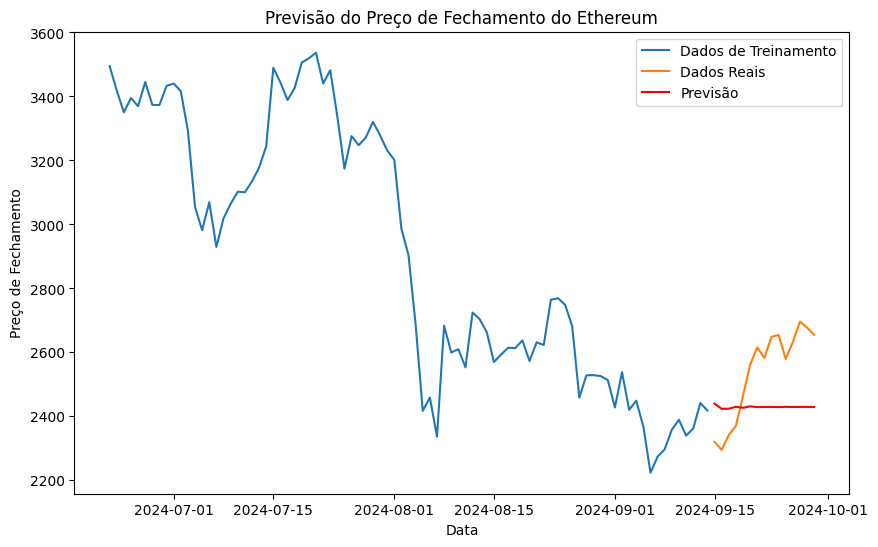

In [54]:
utils.plot_previsions(train_data, test_data, predictions)

# Melhorando o modelo com auto arima

In [55]:
from pmdarima import auto_arima

In [56]:
auto_model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -505.553
Date:                Sun, 29 Sep 2024   AIC                           1013.106
Time:                        11:37:05   BIC                           1015.537
Sample:                    06-22-2024   HQIC                          1014.083
                         - 09-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9889.4204   1125.584      8.786      0.000    7683.316    1.21e+04
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                12.02
Prob(Q):                              0.90   Pr

In [57]:
auto_model = ARIMA(train_data, order=auto_model.order)
auto_model_fit = model.fit()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [58]:
predictions_auto = auto_model_fit.forecast(steps=len(test_data))
predictions_auto[:5]

2024-09-15    2439.820470
2024-09-16    2423.613542
2024-09-17    2423.922246
2024-09-18    2429.936524
2024-09-19    2426.751751
Freq: D, Name: predicted_mean, dtype: float64

In [59]:
mse, mae, rmse = utils.get_metrics(test_data, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 30868.18714153742
MAE: 162.2461095981767
RMSE: 175.69344649570004


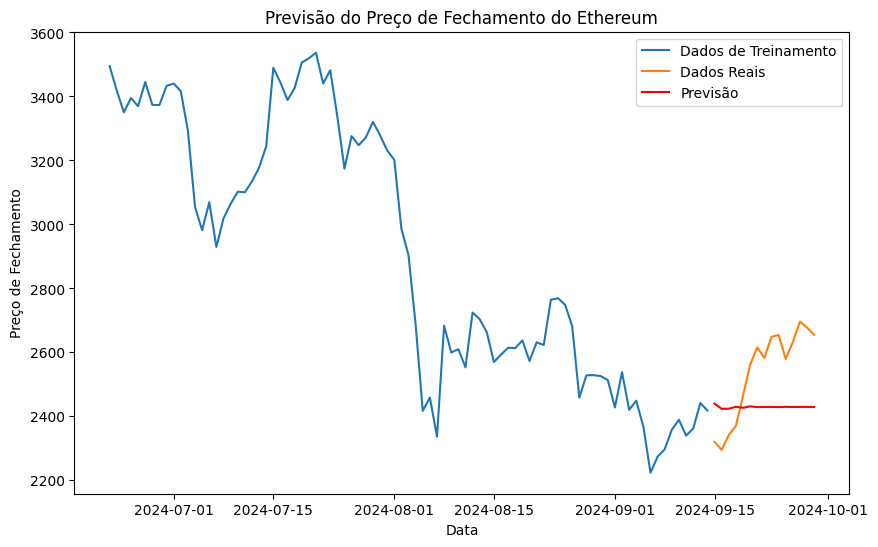

In [60]:
utils.plot_previsions(train_data, test_data, predictions)

O ARIMA não teve resultados tão interessantes, mesmo com o uso do Auto Arima

# Andando pelo tempo, prevendo cada quinzena

In [61]:
all_predictions = []
all_test_data = []
mae_list, mse_list, rmse_list = [], [], []

In [62]:
for start in range(0, len(close_data) - train_size - test_size, test_size):
    data = close_data[start:start + train_size + test_size]

    train_data, test_data = utils.split_train_test(data, train_size, test_size)

    # Treinar o modelo ARIMA
    model = ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()

    # Fazer previsões
    predictions = model_fit.forecast(steps=test_size)

    # Armazenar as previsões e os dados reais
    all_predictions.extend(predictions)
    all_test_data.extend(test_data)

    # Adiciona as métricas também pra plotar depois
    mse, mae, rmse = utils.get_metrics(test_data, predictions)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"Janela {start//test_size + 1}: MAE={mae}, MSE={mse}, RMSE={rmse}")


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 1: MAE=13.71829333622922, MSE=277.85900476228215, RMSE=16.66910329808662
Janela 2: MAE=13.939207563415623, MSE=229.14153659687844, RMSE=15.137421728843998
Janela 3: MAE=11.589640869589205, MSE=199.33623850455257, RMSE=14.118648607588213
Janela 4: MAE=32.357123114228344, MSE=1309.7816184527148, RMSE=36.19090518973952
Janela 5: MAE=10.590794108340228, MSE=146.2258124947033, RMSE=12.092386550830373
Janela 6: MAE=13.307052156960133, MSE=210.74681001421703, RMSE=14.517121271595723


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 7: MAE=8.085181894177907, MSE=119.48109544977596, RMSE=10.93074084633681
Janela 8: MAE=74.44040952286028, MSE=6972.702330118542, RMSE=83.50270851965547
Janela 9: MAE=35.641864796255895, MSE=1705.6138187283502, RMSE=41.29907769827736
Janela 10: MAE=30.057761484266546, MSE=1693.8369941543933, RMSE=41.15625097302223
Janela 11: MAE=17.81726683804506, MSE=403.54504367134564, RMSE=20.08843059254121
Janela 12: MAE=11.011438900577408, MSE=145.8332871037671, RMSE=12.076145374405158


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 13: MAE=33.18762034172037, MSE=1258.0789900801055, RMSE=35.46940921526753
Janela 14: MAE=12.009454169655847, MSE=240.20932423671061, RMSE=15.498687823061365
Janela 15: MAE=51.31805710843905, MSE=3006.311397259891, RMSE=54.829840390611125
Janela 16: MAE=72.606341391268, MSE=6259.582517719976, RMSE=79.11752345542658
Janela 17: MAE=31.194140609630114, MSE=1417.9155533598337, RMSE=37.6552194703448
Janela 18: MAE=103.37514274813749, MSE=24143.216586475268, RMSE=155.38087587111636


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 19: MAE=187.8883599875594, MSE=42773.1400324131, RMSE=206.8166821908066
Janela 20: MAE=115.32640216831675, MSE=19786.206844377997, RMSE=140.6634524116979
Janela 21: MAE=129.56496261029912, MSE=20931.976314914937, RMSE=144.6788730772912
Janela 22: MAE=319.8433469351861, MSE=132805.39042422053, RMSE=364.42473903979203
Janela 23: MAE=278.51701173232505, MSE=81182.8682491689, RMSE=284.9260750601266


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 24: MAE=145.43158527539035, MSE=29191.683567697277, RMSE=170.85573905402558
Janela 25: MAE=143.30706112306476, MSE=38624.12648805779, RMSE=196.53021774795292
Janela 26: MAE=512.8445682201537, MSE=381506.25742607325, RMSE=617.6619281015087
Janela 27: MAE=410.7275540032394, MSE=239135.44125724505, RMSE=489.0147658887664
Janela 28: MAE=553.8688428746694, MSE=416240.7908767369, RMSE=645.1672580631606


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 29: MAE=316.5897584202291, MSE=117146.10040723141, RMSE=342.2661251237572
Janela 30: MAE=197.94841500489468, MSE=58414.249161949774, RMSE=241.690399399624
Janela 31: MAE=170.43251504265993, MSE=40247.63842816286, RMSE=200.6181408252077
Janela 32: MAE=362.8822425799798, MSE=175899.50096925243, RMSE=419.4037445818199


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 33: MAE=483.13316754649156, MSE=273200.7701050131, RMSE=522.6861104955948
Janela 34: MAE=235.90655599330373, MSE=85922.56555946423, RMSE=293.1255116148443
Janela 35: MAE=389.8905395254235, MSE=220011.7253541246, RMSE=469.0540750852982
Janela 36: MAE=545.6604703086226, MSE=340419.7580352102, RMSE=583.455018004996
Janela 37: MAE=234.16265043071536, MSE=76769.65145530873, RMSE=277.07336836171885


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 38: MAE=276.43707731115643, MSE=105054.91089192177, RMSE=324.1217531914848
Janela 39: MAE=294.1110568066975, MSE=99595.91227762098, RMSE=315.58820047273787
Janela 40: MAE=305.6089292904347, MSE=112941.08753439938, RMSE=336.0670878476489
Janela 41: MAE=414.5483149895981, MSE=229725.3195018459, RMSE=479.2966925630156
Janela 42: MAE=106.61764544751176, MSE=19568.693160035215, RMSE=139.88814517333202
Janela 43: MAE=346.8336397542549, MSE=180868.09979932962, RMSE=425.28590359819077


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 44: MAE=532.7509917275743, MSE=398797.6750069407, RMSE=631.5042953194703
Janela 45: MAE=351.95689349027754, MSE=161014.6355374215, RMSE=401.2662900586361
Janela 46: MAE=197.51286307432346, MSE=50491.26424770109, RMSE=224.7026129080414
Janela 47: MAE=298.77814364760945, MSE=106180.11301711173, RMSE=325.85290088798
Janela 48: MAE=452.66055102918784, MSE=245627.4431549971, RMSE=495.60815485118593
Janela 49: MAE=174.66784662786938, MSE=39912.70273531155, RMSE=199.78163763297053
Janela 50: MAE=82.69284299968606, MSE=11620.623518999384, RMSE=107.79899590905002
Janela 51: MAE=369.34048852835224, MSE=238173.48902808412, RMSE=488.0302132328327


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 52: MAE=133.81591167514173, MSE=28040.420436139982, RMSE=167.4527409036352
Janela 53: MAE=128.63804225168607, MSE=44989.693078696764, RMSE=212.10773931824545
Janela 54: MAE=64.35432213633635, MSE=5719.997806044513, RMSE=75.63066710035363
Janela 55: MAE=58.34200563945878, MSE=4347.752488752095, RMSE=65.93748925119985
Janela 56: MAE=379.6604183318936, MSE=163887.07589515642, RMSE=404.82968751705505


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 57: MAE=121.19896052450308, MSE=17864.067471604547, RMSE=133.65652797976068
Janela 58: MAE=275.022521715996, MSE=100708.43421962777, RMSE=317.3459220151218
Janela 59: MAE=162.31164850971356, MSE=33392.95648778907, RMSE=182.7373976168783
Janela 60: MAE=334.14480441853135, MSE=128154.65470922986, RMSE=357.98694767998154
Janela 61: MAE=20.893969827426325, MSE=778.0693864946167, RMSE=27.89389514740845


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 62: MAE=53.83730742965843, MSE=8591.672054863808, RMSE=92.69127280852177
Janela 63: MAE=105.54249505832782, MSE=30017.768599260682, RMSE=173.25636669184968
Janela 64: MAE=152.27079065898002, MSE=26689.488417208275, RMSE=163.36917829630005
Janela 65: MAE=54.835980392598124, MSE=3894.8877293589226, RMSE=62.40903563875124
Janela 66: MAE=55.100287422773775, MSE=3967.8992846009473, RMSE=62.99126355774225


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 67: MAE=30.92947367259297, MSE=1654.4837702758682, RMSE=40.67534597610533
Janela 68: MAE=224.4138679080331, MSE=59253.567034034946, RMSE=243.42055589870577
Janela 69: MAE=59.62603525354079, MSE=4557.133422142918, RMSE=67.50654355055455
Janela 70: MAE=63.16100262870371, MSE=6671.246222837784, RMSE=81.6776972180153
Janela 71: MAE=74.6313781256124, MSE=9646.389940719899, RMSE=98.21603708519245
Janela 72: MAE=300.848968223435, MSE=98200.5107500309, RMSE=313.3696072532097


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 73: MAE=85.4992953294008, MSE=8999.506248893558, RMSE=94.86572747253646
Janela 74: MAE=112.276537829349, MSE=21802.431842673876, RMSE=147.65646563111918
Janela 75: MAE=44.12914214370036, MSE=3185.0364280219487, RMSE=56.43612697574089
Janela 76: MAE=45.42934207695319, MSE=2351.168063517994, RMSE=48.488844732762956
Janela 77: MAE=63.46351938999484, MSE=5178.237437034605, RMSE=71.95997107444252


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 78: MAE=92.21284167877371, MSE=10881.65262249226, RMSE=104.31516007988608
Janela 79: MAE=32.86353582560534, MSE=1399.6202978990007, RMSE=37.41149954090321
Janela 80: MAE=37.81238654360821, MSE=2679.7816044996653, RMSE=51.766607040636394
Janela 81: MAE=31.035992442528308, MSE=1290.1518527181568, RMSE=35.91868389457159
Janela 82: MAE=75.49330140023021, MSE=10531.609720998726, RMSE=102.62363139647088
Janela 83: MAE=22.95024480958218, MSE=1269.4180678776652, RMSE=35.62889372233813


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 84: MAE=18.84860726311714, MSE=790.7964828866262, RMSE=28.12110387034311
Janela 85: MAE=41.71149208864687, MSE=3216.604699813813, RMSE=56.715118793967214
Janela 86: MAE=62.962680746719315, MSE=4884.6716537431985, RMSE=69.89042605209384
Janela 87: MAE=177.69186870180457, MSE=34047.24743205344, RMSE=184.51896225606038
Janela 88: MAE=98.65959384441152, MSE=13595.68029300031, RMSE=116.60051583505242
Janela 89: MAE=80.60680768434074, MSE=12569.209960631228, RMSE=112.11248797806259


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 90: MAE=74.98341756878156, MSE=6885.076538166441, RMSE=82.9763613215622
Janela 91: MAE=98.53466480677017, MSE=12007.350424721075, RMSE=109.57805631019869
Janela 92: MAE=197.4970870562956, MSE=52278.48887588344, RMSE=228.64489689447137
Janela 93: MAE=186.3533833094863, MSE=39651.31470248815, RMSE=199.126378720872
Janela 94: MAE=279.82410394391286, MSE=114975.63887946299, RMSE=339.0805787411939
Janela 95: MAE=289.75836521915056, MSE=132196.73340188203, RMSE=363.58868712032563


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 96: MAE=211.05893011369847, MSE=61373.5635254672, RMSE=247.7368836597958
Janela 97: MAE=765.1496498435891, MSE=638031.4889950175, RMSE=798.7687331105402
Janela 98: MAE=174.3571524368111, MSE=55939.924793395796, RMSE=236.516225222279
Janela 99: MAE=115.37351303735535, MSE=17542.431664080377, RMSE=132.44784507148609
Janela 100: MAE=102.71701445866053, MSE=14848.66595851988, RMSE=121.8551023081097


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 101: MAE=605.4533315725744, MSE=391461.084792834, RMSE=625.6685103094402
Janela 102: MAE=156.61997928371696, MSE=35298.59488922272, RMSE=187.87920291831855
Janela 103: MAE=84.38991093192308, MSE=9982.47644285047, RMSE=99.91234379620202
Janela 104: MAE=261.46555665422653, MSE=88437.07988044732, RMSE=297.38372497574125
Janela 105: MAE=120.59558205287858, MSE=17827.19962215631, RMSE=133.51853662378235
Janela 106: MAE=555.2714111219908, MSE=333991.32586772816, RMSE=577.9198265051374


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

Janela 107: MAE=81.0288151905965, MSE=9651.029742686984, RMSE=98.23965463440405
Janela 108: MAE=136.582155896666, MSE=23375.52530537726, RMSE=152.89056643683827


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [63]:
mse, mae, rmse = utils.get_metrics(all_test_data, all_predictions)
print(f"Métricas gerais - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


Métricas gerais - MAE: 175.82343973670044, MSE: 72360.90015318093, RMSE: 268.99981441105297


In [64]:
print(len(all_test_data), len(all_predictions), len(mae_list))

1620 1620 108


In [65]:
interpolated_mae = np.repeat(mae_list, len(all_test_data) // len(mae_list))

In [66]:
test_data_indices = close_data.index[-len(all_test_data):]

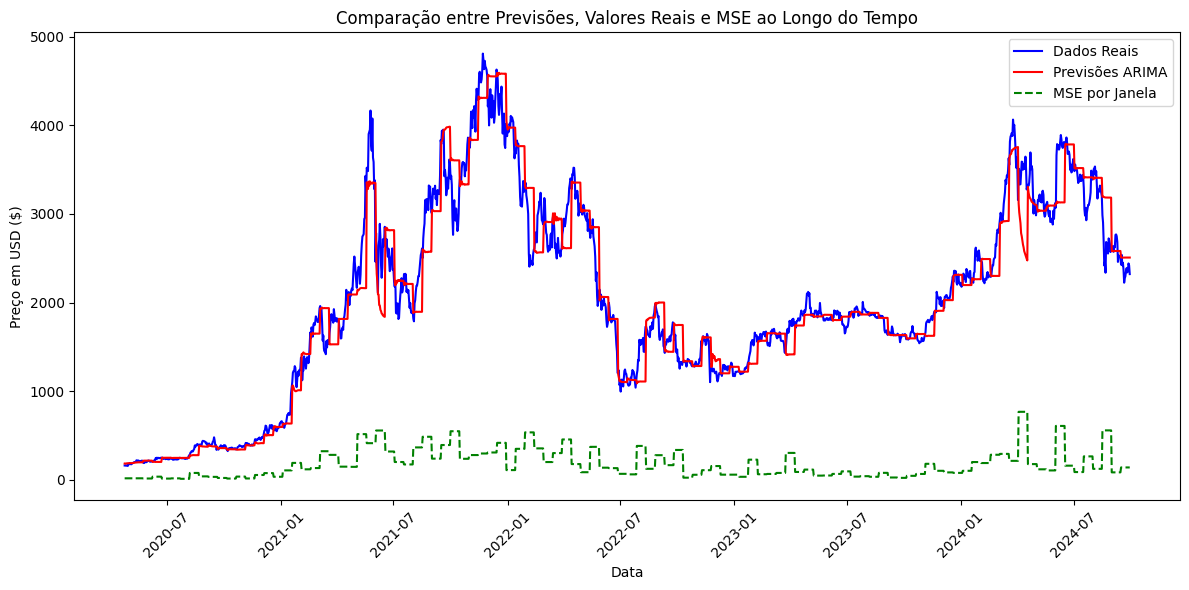

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_indices, all_test_data, label='Dados Reais', color='blue')
plt.plot(test_data_indices, all_predictions, label='Previsões ARIMA', color='red')
plt.plot(test_data_indices, interpolated_mae, label='MAE por Janela', color='green', linestyle='--')
plt.title('Comparação entre Previsões, Valores Reais e MAE ao Longo do Tempo')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Preço em USD ($)')
plt.legend()

plt.tight_layout()
plt.show()
